# **Introducción a Pipelines de Pre-procesamiento** 🐍


## ¿Qué son los pipelines de Pre-procesamiento? 🧐

De manera elemental un pipeline se encuentra compuesto por una serie de pasos o etapas que deben de cumplirse, permitiendo que los datos se transformen en cada una de ellas. Este método es ampliamente empleado en el preprocesamiento de datos, entrenamiento de modelos de Machine Learning y su posterior ejecución.

### ¿Qué aprenderás durante este mini curso de Introducción a Pipelines?

1️⃣ Recordarás como realizar un EDA, aunque no profundizaremos en este, pues es fundamental entender el comportamiento de nuestros datos antes de aplicrles cualquier método avanzado.

2️⃣ Básicos de pipelines, incluye las secuencias de transformaciones que emplearemos a lo largo de este mini curso, como la imputación, escalamiento y codificación.

3️⃣ Transformadores de columnas, revisaremos como aplicar diferentes transformaciones a grupos especificos de features, empleando funciones como `ColumnTransformer`.

4️⃣ Aprenderás que manejo debe dársele a las columnas no especificadas.

5️⃣ Transformadores de funciones.


📌 **Importante** en este minicurso no exploraremos la fuga de datos, sin embargo debemos tener presente que también son ampliamente usadasen los pipelines de preprocesamiento.



## **Mini EDA**

Antes de comenzar a dar nuestros primeros pasos en los pipelines, es fundamental ejecutar un mini EDA que nos permita entender a profundidad las dinámicas de los datos que estaremos empleando.

### **Nuestra Base de Datos** 🚗

En mi caso estaré usando la base de datos Car Price Dataset, extraída de recurso Kaggle, sin embargo puedes utilizar cualquiera de tu preferencia.

Car Price Dataset es un dataset que contiene 10.000 filas y 10 columnas, fue creado con el propósito de poder predcir los precios de los carros. Cada una de las filas contiene la información y precio respectivos de un carro.

**Descripción de las columnas:**

* Brand: Especifica la marca del carro.

* Model: Especifica el modelo del carro.

* Year:  Indica el año en el cual se produjo el carro.

* Engine_size: Especifica el tamaño del motor en litros.

* Fuel_type: Indica e tipo de combustible que emplea el carro.

* Transmission: Indica el tipo de transmisión del carro.

* Mileage: Indica el total de la distancia que ha recorrido el carro, medido en kilómetros.

* Doors: Indica el número de puestas que tiene el carro.

* Owner_count: Especifica la canidad de dueños que ha tenido el carro.

* Price: Especifica el precio estimado de venta del carro.  



In [2]:
# Cargando las librerías necesarias para realizar el EDA:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from sklearn.linear_model import LinearRegression 

In [3]:
df=pd.read_csv(r"D:\documentos\Mis archivos recibidos\SUSY\UNAULA\NOVENO SEMESTRE\CIENCIA DATOS 2\recorderis\Entrega_1\car_price_dataset.csv", delimiter=",", quotechar='"')
print(df)

           Brand     Model  Year  Engine_Size Fuel_Type    Transmission  \
0            Kia       Rio  2020          4.2    Diesel          Manual   
1      Chevrolet    Malibu  2012          2.0    Hybrid       Automatic   
2       Mercedes       GLA  2020          4.2    Diesel       Automatic   
3           Audi        Q5  2023          2.0  Electric          Manual   
4     Volkswagen      Golf  2003          2.6    Hybrid  Semi-Automatic   
...          ...       ...   ...          ...       ...             ...   
9995         Kia    Optima  2004          3.7    Diesel  Semi-Automatic   
9996   Chevrolet    Impala  2002          1.4  Electric       Automatic   
9997         BMW  3 Series  2010          3.0    Petrol       Automatic   
9998        Ford  Explorer  2002          1.4    Hybrid       Automatic   
9999  Volkswagen    Tiguan  2001          2.1    Diesel          Manual   

      Mileage  Doors  Owner_Count  Price  
0      289944      3            5   8501  
1        5356

In [4]:
# Identificamos si tenemos valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64


Tal y como lo indican los resultados en este caso no tenemos problemas con valores nulos

In [10]:
# Estadísticas descriptivas

df.describe().T
print(df.describe().T)

               count          mean           std     min       25%       50%  \
Year         10000.0    2011.54370      6.897699  2000.0   2006.00    2012.0   
Engine_Size  10000.0       3.00056      1.149324     1.0      2.00       3.0   
Mileage      10000.0  149239.11180  86322.348957    25.0  74649.25  149587.0   
Doors        10000.0       3.49710      1.110097     2.0      3.00       3.0   
Owner_Count  10000.0       2.99110      1.422682     1.0      2.00       3.0   
Price        10000.0    8852.96440   3112.596810  2000.0   6646.00    8858.5   

                  75%       max  
Year           2017.0    2023.0  
Engine_Size       4.0       5.0  
Mileage      223577.5  299947.0  
Doors             4.0       5.0  
Owner_Count       4.0       5.0  
Price         11086.5   18301.0  


A partir de las estadísticas obtenidas, se observa de manera preliminar como las variables de year, mileage y price destacan con valores muy superiores a los de las otras tres variables restantes, esto como resultado directo de su naturaleza (explicada anteriormente en la descripción de las columnas). Ahora bien un analisis particular para cada variables se presenta a continuación:

* **Year**: Posee una media de 2011 con una desviación estándar de 6.89, es decir que los datos se encuentran, principalmente, entre 2004 y 2018.

* **Engine_size**: En promedio los carros incluidos en este estudio cuentan con motores de 3.0 litros, no obstante, dada su desviación estándar este valor varia entre los 2.0 litro y 4.0.

* **Miliage**: Si bien el promedio de distancia recorrida por los vehículos cuenta con una media de 149239 kilómetros, presenta una gran variabilidad (std=86322.34), sugieriendo que en este estudio fue empleada una mustra bastante diversa, con autos con mucho recorrido y otros poco usados.

* **Doors** : Se identifica que, la mayor parte de los carros cuentan con 3 o 4 puertas, sin embargo, tambien fueron tenido en cuenta autos con 2 y 5 puertas.

* **Owner_count**: De acuerdo con este estudio, en promedio lo autos han tenido 3 dueños, pero es importante tener en cuenta que este valores oscilan entre 1 y 5 (esta información se obtiene a partir de la desviación estandar).

* **Price**: Dadas las estadísticas para esta variable se podría intuir que fueron tenidos en cuentas autos de categorías economícas y medias.

In [13]:
# De manera complmentaria al EDA que practicamos anteriormente, corroboraremos la información
# general de nuestros features:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


### Gráfico 📊

Para culminar este pequeño EDA, se presenta a continuación un gráfico de correlaciones o calor para identificar las relaciones existentes entre las variables más significativas de la base de datos. 

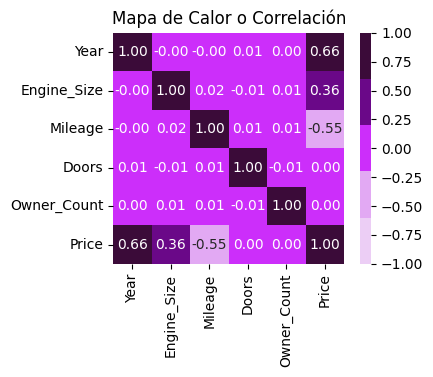

In [14]:
variables_relevantes = df[['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count','Price' ]]
paleta_colores = ["#ECCEF5", "#E2A9F3", "#CC2EFA", "#6A0888", "#3B0B39"]
correlacion = variables_relevantes.corr()

plt.figure(figsize=(4, 3))
sns.heatmap(correlacion, annot=True, cmap= paleta_colores, vmin=-1, vmax=1, square=True, fmt=".2f")
plt.title('Mapa de Calor o Correlación')
plt.show()

A partir del gráfico se pueden hacer una serie de comentarios:

 **1.** En términos generales la base de datos no presenta altos síntomas de correlación, lo que permite descartar indicios de multicolinalidad, indicando que no hay dependencia fuerte entre las variables lo cual es positivo para nuestras posibes tareas predictivas.

 **2.** Entre las pocas variables que presentan síntomas de estar relacionadas entre ellas está Correlacion Año-Precio con un coeficiete de 0.66, sugiriendo que aquellos carrs que sean más nuevos tendran un precio más elevado.

 **3.** Correlación Engine_size - Precio, con un coeficiente de 0.36 indica que aquellos autos con moores de mayor capacidad suelen ener precios más elevados, no obstante se destaca que esta relación no es tan fuerte.

 **4.** La correlación entre Mileage - Price, al ser negativa y de coeficiente 0.55, sugiere que a un mayor kilometraje (interpretado como desgaste) el precio tiende a ser menor.

Una vez concluido este mini EDA podemos proseguir con nuestros primeros pasos con Pipelines de preprcesamiento ✈️

## **Inicio Oficial de Pipelines de Pre-procesamiento** 🔭

### **¿Qué librerías necesitaras para este mini curso?**

In [1]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, FunctionTransformer, KBinsDiscretizer, OneHotEncoder
from sklearn.compose import ColumnTransformer

📌 Dado que mi base de datos tiene una gran cantidad de filas, en las proximas líneas voy a reducir su dimensionalidad conservando la misma cantidad de columnas, pero reduciendo las filas a 50
este proceso lo hice de manera aleatoria para garantizar así poder tener observaciones de diferentes años, modelos, número de puertas, etc. Si no deseas alterar las dimensiones puedes omitir estas líneas.


In [83]:
import pandas as pd

df=pd.read_csv(r"D:\documentos\Mis archivos recibidos\SUSY\UNAULA\NOVENO SEMESTRE\CIENCIA DATOS 2\recorderis\Entrega_1\car_price_dataset.csv", delimiter=",", quotechar='"')

target_sample_size = 50 # Nos ayudará a definir el tamaño de la muestra total

df_sampled = df.groupby(["Year", "Brand", "Model"], group_keys=False).apply(lambda x: x.sample(n=1, random_state=42)) # Nos permite obtener una muestra diversa y replicable gracias l random_state

if len(df_sampled) > target_sample_size:
    df_sampled = df_sampled.sample(n=target_sample_size, random_state=42) # Si se genera una muestra con más de 50 filas, entonces iremos reduciendo aleatoriamente

df_sampled = df_sampled.reset_index(drop=True)

print(df_sampled)



         Brand     Model  Year  Engine_Size Fuel_Type    Transmission  \
0         Ford    Fiesta  2011          1.4    Hybrid       Automatic   
1          Kia  Sportage  2009          1.4    Petrol       Automatic   
2       Toyota     Camry  2001          1.7    Petrol  Semi-Automatic   
3          Kia    Optima  2006          4.6    Hybrid          Manual   
4          BMW  3 Series  2015          3.8  Electric  Semi-Automatic   
5          BMW        X5  2002          3.2    Petrol  Semi-Automatic   
6          BMW  3 Series  2002          1.9  Electric       Automatic   
7       Toyota   Corolla  2004          3.0  Electric       Automatic   
8     Mercedes   E-Class  2009          2.0    Petrol  Semi-Automatic   
9         Audi        A3  2013          4.9    Petrol          Manual   
10     Hyundai    Sonata  2023          3.4    Hybrid  Semi-Automatic   
11  Volkswagen    Passat  2014          3.5    Petrol       Automatic   
12        Ford  Explorer  2001          1.6    Dies

C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_40532\232801921.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby(["Year", "Brand", "Model"], group_keys=False).apply(lambda x: x.sample(n=1, random_state=42)) # Nos permite obtener una muestra diversa y replicable gracias l random_state


Para evitar posibles errores que se puedan presentar en nuestro pipeline, como aplicación de métodos de variables numéricas a categóricas realizaremos las transformaciones por grupos. 

### **Variables numéricas:** 🧮

A este tipo de datos se le realizan transformaciones con el objetivo de llevar a una escala similar los valores facilitando su manejo e interpretación.

#### **Tipos de transformaciones**

**1.** En caso de tener valores nulos podemos aplicar **Imputación** lo que quiere decir, que para evitar dejar el "Nan" por default se puede definir algun valor que lo reemplace, esta elección es a discreción y bajo las necesidades de cada proyecto. Los más utilizados son: Agregar valores outliers, reemplazar con medidas de tendencia central (media, moda,mediana) o cambiar el "Nan" por alguna etiqueta personalizada.

**2.** **Estandarización** Este método de transformación emplea una fórmula sencilla donde tomamos el valor que deseamos cambiar, le restamos su media y lo divdimos por su desviación estandar. Esta transformación se hace con el objetivo de que todos lo datos tengan una media de 0 y una varianza de 1.

**3.** **Normalización** Este método es ideal para aqullas ocasiones donde requerimos que nuestros valores se ubiquen en una escala comprendida entre 0 y 1. Esto se logra así: Tomamos nuestro valor original y este le restamos su valor mínimo, porteriormente este reultado lo dividimos entre la resta de su valor máximo y el mínimo nuevamente.

**4.** **Discretización** Este método divide el rango de valores continuos en intervalos o "bins". Cada valor en el intervalo se asigna a un bin específico. Existen varios métodos para discretizar, como el de igual frecuencia (cuartiles) o igual anchura.

**5.** **Transformación logarítmica** Como su nombre lo indica, esta es una transformación basada en la aplicación de logarítmo a las variables que deseamos transformar.


En las líneas a continuación encontrarás un ejemplo de cada transformación:


In [24]:
# En mi caso no estaré empleando imputación ya que no tengo valores nulos.
# primero estaremos haciendo un ColumnTransformer, para posteriormente unirlo
# todo en un pipeline

num_pipeline = ColumnTransformer(
    [
        ("std_scaler", StandardScaler(), ["Engine_Size"]),  # Escalamiento por desviación estándar
        ("minmax_scaler", MinMaxScaler(), ["Owner_Count"]),  # Escalamiento entre 0 y 1
        ("robust_scaler", RobustScaler(), ["Doors"]),  # Escalamiento robusto
        ("binned_mileage", KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile'), ["Mileage"]),  # Discretización
        ("log_price", FunctionTransformer(np.log1p), ["Price"])  # Transformación logarítmica
    ],
      verbose_feature_names_out=False,
    remainder="passthrough"  # Mantener otras columnas sin cambios
).set_output(transform="pandas")

# Aplicar la transformación a los datos
transformed_df = num_pipeline.fit_transform(df_sampled)
display(num_pipeline)
print(transformed_df)


# En caso de que desees añadir una etiqueta que te indique que tipo de método de
# transformación aplicaste a cada columna, te recomiendo esta estructura

#("std_scaler", StandardScaler(), ["Engine_Size"]) en este caso a columna quedaria 
# con este nombre std_scaler__Engine_Size

c:\Users\EQUIPO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('std_scaler', StandardScaler(),
                                 ['Engine_Size']),
                                ('minmax_scaler', MinMaxScaler(),
                                 ['Owner_Count']),
                                ('robust_scaler', RobustScaler(), ['Doors']),
                                ('binned_mileage',
                                 KBinsDiscretizer(encode='ordinal'),
                                 ['Mileage']),
                                ('log_price',
                                 FunctionTransformer(func=<ufunc 'log1p'>),
                                 ['Price'])],
                  verbose_feature_names_out=False)

    Engine_Size  Owner_Count  Doors  Mileage     Price       Brand     Model  \
0     -1.402655         0.50    0.0      0.0  9.276596        Ford    Fiesta   
1     -1.402655         0.75   -1.0      1.0  8.990317         Kia  Sportage   
2     -1.125085         0.25    0.0      2.0  7.731931      Toyota     Camry   
3      1.558095         0.50    0.0      4.0  8.708144         Kia    Optima   
4      0.817907         0.25    0.5      1.0  9.453992         BMW  3 Series   
5      0.262767         0.50   -0.5      0.0  8.964696         BMW        X5   
6     -0.940038         0.75    0.5      2.0  8.946375         BMW  3 Series   
7      0.077720         0.00    0.0      4.0  8.727130      Toyota   Corolla   
8     -0.847515         0.50    0.0      2.0  8.721113    Mercedes   E-Class   
9      1.835665         0.75    0.5      1.0  9.398644        Audi        A3   
10     0.447813         0.00    0.0      1.0  9.561208     Hyundai    Sonata   
11     0.540337         1.00   -0.5     

#### **Analicemos nuestros primeros reultados** 🧐

Vemos en primer lugar que con el comando `display` obtenenmos un pequeño diagrama estilo mapa conceptual que nos ayuda aidentifacar plenamente que transformación hemos realizao a nuestras variables, lo qe siempre es de grn ayuda para guiarnos.

* En la primera variable (`Engine_size`)  aplicamos la transformación por desviación estándar lo que si en algun momento decidieramos obtener las estadíticas descriptivas de esta variable transformada nos daria media cero y varianza 1.

In [ ]:
transformed_df["std_scaler__Engine_Size"].describe().T

# En este caso obtuvimos una desviación estandar bastante cercana a 1 
# (recordemos que la varanza es la std al cuadro) lo que va de acuerdo 
# con la teoría y una media que tambien tiende a cero.

count    5.000000e+01
mean    -3.907985e-16
std      1.010153e+00
min     -1.587702e+00
25%     -9.400382e-01
50%      1.702431e-01
75%      8.872999e-01
max      1.835665e+00
Name: std_scaler__Engine_Size, dtype: float64

* En la segunda variable `Owner_Count`aplicamos una normalización, por tanto y de acuerdo con lo que establecimos previamente todos los vaores se encuentran entre 0 y 1

In [22]:
transformed_df["minmax_scaler__Owner_Count"].describe().T

# Si observamos los valores obtenidos en min y en max, ambos responden adecuadamente a nuestro
# propósito siendo 0 y 1 respectivamente

print(df_sampled.columns)


Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price'],
      dtype='object')


* En la tercera variable (`Doors`)aplicamos una transformación robusta, la cual es perfecta para el tratamiento de datos átipicos, solo para fines ilustrativo se considero 5 puerta cmo un valor atípico. De manera matemática esta transfrmación se define como: la resta entre la variable que deseamos ajustar y la mediana, y este resultado lo dividimos por el rango intercuartil.

* Para la variable (`Mileage`) empleamos la una transforzación de discretización, es importante destacar que esta metodología puede usar diferentes estrategia, en este caso empleamos la de cuantiles y dividimos la variable en 5 intervalos de igual frecuecia. Cada intervalo se asigna a una categoría numérica, facilitando su uso en modelos que funcionan mejor con datos categóricos en lugar de continuos.

* Para la variable (`Price`) se empleó una transformación logarítmica.

Si bien se aplicaron diferentes metodologías con todas llegamos a conslusiones muy similares, cambiamos la escala de los datos para facilitar su manejo.

### **Variables Categóricas:** 📖

A estas variables, a diferencia de las numéricas no nos ofrecen un abanico tan amplio de posibilidades en cuanto a transformación. De manera elemental se podrían mencionar 3, sin embargo, antes de mencionarlas tenemos que hacer hincapie en el concepto de variables **Categóricas** y las dos categorías que lo componen: **Nominales** son aquellas variables que no tienen ningún orden implícito. **Ordinales** son aquellas variables si tienen un orden implícito, como mal, bien y muy bien.

#### **Posibles transformaciones**

**1.** **Imputación** al igual que las variables numéricas, hay ocasiones en las que nos encontramos con categóricas faltante y frente a ello tenemos dos opciones: Poner en su reemplazo el valor que más se repitió en esa variable; o en segundo lugar poner un valor personalizado como "missing".

**2.** **Asignar valores numéricos a variabes ordinales** ya que estas variables representan escalas, resulta plausible asignarles valores numéricos proporcinales a lo que representan. En caso de que sea necesario asignarle un valor numérico a una variable así sea nominal, el ciéntifico podrá establecer una escala propia a discreción.

**3.** **Otras** ya que estas variables nos ofrecen unas opciones reducidas, podemos recurrir a transformaciones un poco más comunes, como contar la cantidad de caracteres que tiee el string o separar en columnas los caracteres que lo componen, todo esto bajo la luz del propósito de nuestro proyecto

In [25]:
# Crearemos unas columnas nuevas ya que la transformación que aplicaremos lo requiere


cat_pipeline = ColumnTransformer(
    [
        ("nominal_pipeline", OneHotEncoder(sparse_output=False), ["Fuel_Type"]),  # One-Hot Encoding

    ],
    verbose_feature_names_out=False,
    remainder="passthrough"  # Mantener otras columnas sin cambios
).set_output(transform="pandas")


transformed_df_cat = cat_pipeline.fit_transform(df_sampled)
display(cat_pipeline)
print(transformed_df_cat)



c:\Users\EQUIPO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('nominal_pipeline',
                                 OneHotEncoder(sparse_output=False),
                                 ['Fuel_Type'])],
                  verbose_feature_names_out=False)

    Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_Hybrid  Fuel_Type_Petrol  \
0                0.0                 0.0               1.0               0.0   
1                0.0                 0.0               0.0               1.0   
2                0.0                 0.0               0.0               1.0   
3                0.0                 0.0               1.0               0.0   
4                0.0                 1.0               0.0               0.0   
5                0.0                 0.0               0.0               1.0   
6                0.0                 1.0               0.0               0.0   
7                0.0                 1.0               0.0               0.0   
8                0.0                 0.0               0.0               1.0   
9                0.0                 0.0               0.0               1.0   
10               0.0                 0.0               1.0               0.0   
11               0.0                 0.0

Una vez ehecutado nuestro One Hot Encoder, finalizaremos nuestro Pipeline con unas pequeñas transforcaciones a otras variables: A la variable `Brand` le aplicaremos un len con la finalidad de saber cuantas letras tiene y la variable `Model` la separemos en dos columnas.

In [84]:
# Para ejecutar la transformación que te propongo priero debemos de hacer unos 
# cuantos ajustes a nuestr base de datos

df_sampled["Model"] = df_sampled["Model"].apply(lambda x: x.replace("-", " ") if "-" in x else (x if " " in x else x + " NAN"))


In [85]:
# Function to extract the first name
def Modelo_serie(data: pd.DataFrame, input_col: str):
    data["Modelo_serie"] = data[input_col].str.split(" ").str[0]
    return data

# Function to extract the last name
def Modelo_name(data: pd.DataFrame, input_col: str):
    data["Modelo_name"] = data[input_col].str.split(" ").str[1]
    return data



In [86]:
modelo_pipeline=Pipeline([
    ("Modelo_serie", FunctionTransformer(Modelo_serie,kw_args={"input_col":'Model'})),
    ("Modelo_name",FunctionTransformer(Modelo_name,kw_args={"input_col":'Model'}))
])
display(modelo_pipeline)
modelo_pipeline.fit_transform(df_sampled)



Pipeline(steps=[('Modelo_serie',
                 FunctionTransformer(func=<function Modelo_serie at 0x0000028153D5D580>,
                                     kw_args={'input_col': 'Model'})),
                ('Modelo_name',
                 FunctionTransformer(func=<function Modelo_name at 0x0000028153884CC0>,
                                     kw_args={'input_col': 'Model'}))])

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price,Modelo_serie,Modelo_name
0,Ford,Fiesta NAN,2011,1.4,Hybrid,Automatic,30785,4,3,10684,Fiesta,NAN
1,Kia,Sportage NAN,2009,1.4,Petrol,Automatic,83765,2,4,8024,Sportage,NAN
2,Toyota,Camry NAN,2001,1.7,Petrol,Semi-Automatic,191025,4,2,2279,Camry,NAN
3,Kia,Optima NAN,2006,4.6,Hybrid,Manual,272450,4,3,6051,Optima,NAN
4,BMW,3 Series,2015,3.8,Electric,Semi-Automatic,82067,5,2,12758,3,Series
5,BMW,X5 NAN,2002,3.2,Petrol,Semi-Automatic,3901,3,3,7821,X5,NAN
6,BMW,3 Series,2002,1.9,Electric,Automatic,121009,5,4,7679,3,Series
7,Toyota,Corolla NAN,2004,3.0,Electric,Automatic,281618,4,1,6167,Corolla,NAN
8,Mercedes,E Class,2009,2.0,Petrol,Semi-Automatic,133496,4,3,6130,E,Class
9,Audi,A3 NAN,2013,4.9,Petrol,Manual,41433,5,4,12071,A3,NAN


In [88]:
# para concluir vams a procesar a Brand

def brand_len(data: pd.DataFrame, input_col: str):
    data['brand_len'] = data[input_col].apply(len)
    return data

brand_pipeline=Pipeline([
    ("brand_len", FunctionTransformer(brand_len, kw_args={"input_col": "Brand"})),

])

# Display the pipeline
display(brand_pipeline)

Pipeline(steps=[('brand_len',
                 FunctionTransformer(func=<function brand_len at 0x00000281538D6CA0>,
                                     kw_args={'input_col': 'Brand'}))])

In [89]:
#finalmente juntamos todos nuestros pipelines

pipeline_completo=Pipeline([
    ("num_pipeline",num_pipeline),
    ("cat_pipeline",cat_pipeline),
    ("modelo_pipeline",modelo_pipeline),
    ("brand_pipeline",brand_pipeline)                         
]).set_output(transform="pandas")
display(pipeline_completo)

Pipeline(steps=[('num_pipeline',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('std_scaler',
                                                  StandardScaler(),
                                                  ['Engine_Size']),
                                                 ('minmax_scaler',
                                                  MinMaxScaler(),
                                                  ['Owner_Count']),
                                                 ('robust_scaler',
                                                  RobustScaler(), ['Doors']),
                                                 ('binned_mileage',
                                                  KBinsDiscretizer(encode='ordinal'),
                                                  ['Mileage']),
                                                 ('log_price',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['...
                                  FunctionTransformer(func=<function Modelo_serie at 0x0000028153D5D580>,
                                                      kw_args={'input_col': 'Model'})),
                                 ('Modelo_name',
                                  FunctionTransformer(func=<function Modelo_name at 0x0000028153884CC0>,
                                                      kw_args={'input_col': 'Model'}))])),
                ('brand_pipeline',
                 Pipeline(steps=[('brand_len',
                                  FunctionTransformer(func=<function brand_len at 0x00000281538D6CA0>,
                                                      kw_args={'input_col': 'Brand'}))]))])

In [91]:
#aplicando el pipeline
transformed_df_completo=pipeline_completo.fit_transform(df_sampled)
print(transformed_df_completo.head())

   Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_Hybrid  Fuel_Type_Petrol  \
0               0.0                 0.0               1.0               0.0   
1               0.0                 0.0               0.0               1.0   
2               0.0                 0.0               0.0               1.0   
3               0.0                 0.0               1.0               0.0   
4               0.0                 1.0               0.0               0.0   

   Engine_Size  Owner_Count  Doors  Mileage     Price   Brand         Model  \
0    -1.402655         0.50    0.0      0.0  9.276596    Ford    Fiesta NAN   
1    -1.402655         0.75   -1.0      1.0  8.990317     Kia  Sportage NAN   
2    -1.125085         0.25    0.0      2.0  7.731931  Toyota     Camry NAN   
3     1.558095         0.50    0.0      4.0  8.708144     Kia    Optima NAN   
4     0.817907         0.25    0.5      1.0  9.453992     BMW      3 Series   

   Year    Transmission Modelo_serie Modelo_name  

### **¿Qué aprendiste?** 🧠

A lo largo de este corto curso de `Pipelines`:

**1.** Repasamos como se hace un analisis EDA de manera general, comprendimos ua de sus aplicaciones, ya que gracias a las estadísticas recolectadas en esta primera etapa identificamos las principales necesidadades de nuestro dataset.

**2.** Comprendimos cuales son los diferentes tipos de datos que podemos encontrar en un dataset y que trataiento se le puede dar a cada uno de ellos.

**3.** Pusimos en práctica conceptos como `Pipelines`, `FunctionTransformer`,`ColumnTransormer`, funciones cortas con `Lambda` ebtre otros.

**4.** Comprendimos la gran utiidad de los `Pipelines` para el adecuado procesamiento de datos.